In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



In [2]:
import plotly
plotly.__version__

'4.1.1'

In [3]:
from pandas.tools.plotting import parallel_coordinates
import plotly.express as px


In [4]:
archTrain=pd.read_csv('../orga2020/nlp-getting-started/train.csv',low_memory=False)
archTrain.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
archTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
print(archTrain.shape)

(7613, 5)


In [7]:
archTrain.size #fila por columnas

38065

In [8]:
#cantidad de cada uno no null
archTrain.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [9]:
#veamos la cantidad de nulos que tenemos
archTrain.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
archTrain['keyword']=archTrain['keyword'].str.replace('%20','_')
archTrain.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane_accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew_up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown_up', 'body_bag', 'body_bagging', 'body_bags',
       'bomb', 'bombed', 'bombing', 'bridge_collapse', 'buildings_burning',
       'buildings_on_fire', 'burned', 'burning', 'burning_buildings',
       'bush_fires', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemical_emergency', 'cliff_fall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash', 'crashed',
       'crush', 'crushed', 'curfew', 'cyclone', 'damage', 'danger', 'dead',
       'death', 'deaths', 'debris', 'deluge', 'deluged', 'demolish',
       'demolished', 'demolition', 'derail', 'derailed', 'derailment',
       'desol

### Vemos que tenemos 61 valores nan's en los Keywords

In [11]:
archTrain.keyword.isnull().sum()

61

#### Nos quedamos con los keyword

In [12]:
#veamos la cantidad de keyword 
arch_keyword=archTrain[['keyword','target']]
arch_keyword.head()

,keyword,target
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,1


In [13]:
arch_keyword['cantidad']=1
arch_keyword.head()

,keyword,target,cantidad
0,NaN,1,1
1,NaN,1,1
2,NaN,1,1
3,NaN,1,1
4,NaN,1,1


In [14]:
arch_keyword.dtypes

keyword     object
target       int64
cantidad     int64
dtype: object

In [15]:
arch_keyword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
keyword     7552 non-null object
target      7613 non-null int64
cantidad    7613 non-null int64
dtypes: int64(2), object(1)
memory usage: 178.5+ KB


### Creamos la tabla de keyword con la cantidad de false y true (acá se elimina los nan)

In [16]:
tabla_keyword=pd.pivot_table(arch_keyword,  values='cantidad', columns='target', index='keyword',aggfunc=np.sum)
tabla_keyword.fillna(0,inplace=True)
tabla_keyword.head()

target,0,1
keyword,,
ablaze,23.0,13.0
accident,11.0,24.0
aftershock,34.0,0.0
airplane_accident,5.0,30.0
ambulance,18.0,20.0


In [17]:
tabla_keyword.rename(columns={0:"False",1:"True"},inplace=True)
tabla_keyword.head()

target,False,True
keyword,,
ablaze,23.0,13.0
accident,11.0,24.0
aftershock,34.0,0.0
airplane_accident,5.0,30.0
ambulance,18.0,20.0


In [18]:
tabla_keyword["totalUso"]=tabla_keyword['False']+tabla_keyword['True']
tabla_keyword.reset_index(inplace=True)
tabla_keyword.head()

target,keyword,False,True,totalUso
0,ablaze,23.0,13.0,36.0
1,accident,11.0,24.0,35.0
2,aftershock,34.0,0.0,34.0
3,airplane_accident,5.0,30.0,35.0
4,ambulance,18.0,20.0,38.0


In [19]:
tabla_keyword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 4 columns):
keyword     221 non-null object
False       221 non-null float64
True        221 non-null float64
totalUso    221 non-null float64
dtypes: float64(3), object(1)
memory usage: 7.0+ KB


In [20]:
tabla_keyword_ordTotal=tabla_keyword.sort_values(by='totalUso',ascending=False)
tabla_keyword_ordTotal=tabla_keyword_ordTotal.head(10)
tabla_keyword_ordTotal

target,keyword,False,True,totalUso
104,fatalities,19.0,26.0,45.0
63,deluge,36.0,6.0,42.0
8,armageddon,37.0,5.0,42.0
177,sinking,33.0,8.0,41.0
57,damage,22.0,19.0,41.0
119,harm,37.0,4.0,41.0
29,body_bags,40.0,1.0,41.0
153,outbreak,1.0,39.0,40.0
95,evacuate,15.0,25.0,40.0
106,fear,35.0,5.0,40.0


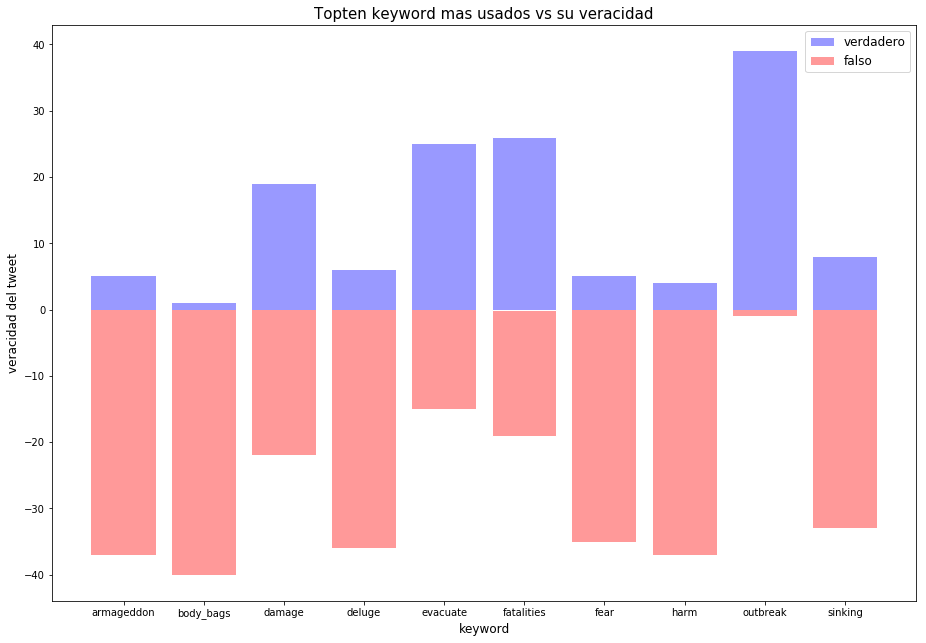

In [21]:
X  = tabla_keyword_ordTotal['keyword']
Y1 = tabla_keyword_ordTotal['True']
Y2 = tabla_keyword_ordTotal['False']


fig=plt.figure(figsize=(12,8))
ax=fig.add_axes([0,0,1,1])
ax.bar(X, Y1, facecolor='#9999ff', edgecolor='white',label='verdadero')
ax.bar(X, -Y2, facecolor='#ff9999', edgecolor='white',label='falso')


plt.title('Topten keyword mas usados vs su veracidad', fontsize=15);
ax.set_xlabel('keyword', fontsize=12);
ax.set_ylabel('veracidad del tweet', fontsize=12);

ax.legend(fontsize=12)




plt.show()

In [22]:
arch_keyword_conNans=archTrain[['keyword']]

In [23]:
arch_keyword_conNans['keyword']=arch_keyword_conNans['keyword'].astype('str')
arch_keyword_conNans.keyword.unique()

array(['nan', 'ablaze', 'accident', 'aftershock', 'airplane_accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew_up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown_up', 'body_bag', 'body_bagging', 'body_bags',
       'bomb', 'bombed', 'bombing', 'bridge_collapse', 'buildings_burning',
       'buildings_on_fire', 'burned', 'burning', 'burning_buildings',
       'bush_fires', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemical_emergency', 'cliff_fall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash', 'crashed',
       'crush', 'crushed', 'curfew', 'cyclone', 'damage', 'danger', 'dead',
       'death', 'deaths', 'debris', 'deluge', 'deluged', 'demolish',
       'demolished', 'demolition', 'derail', 'derailed', 'derailment',
       'des

# Visu ?: Se muestra el Keyword mas usado considerando los nan's

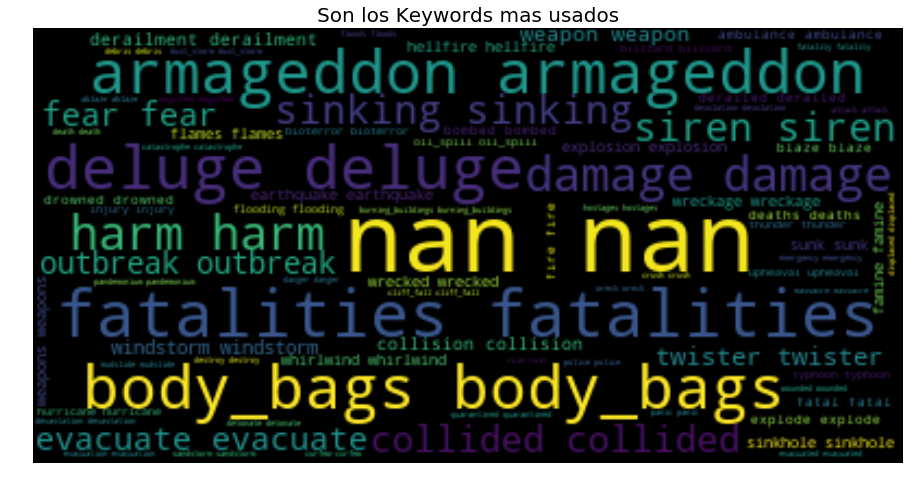

In [24]:
from wordcloud import WordCloud
#consideramos los nans como un string asi podemos mostrar la cantidad que existen

text =" ".join(review for review in arch_keyword_conNans.keyword)


wordcloud = WordCloud().generate(text)


plt.figure(figsize=[16,8])
plt.title("Son los Keywords mas usados",fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
arch_keyword_sinnan=archTrain[['keyword']]


In [26]:
arch_keyword_sinnan.dropna(inplace=True)

# Visu ?: Se muestra el Keyword sin los nan's

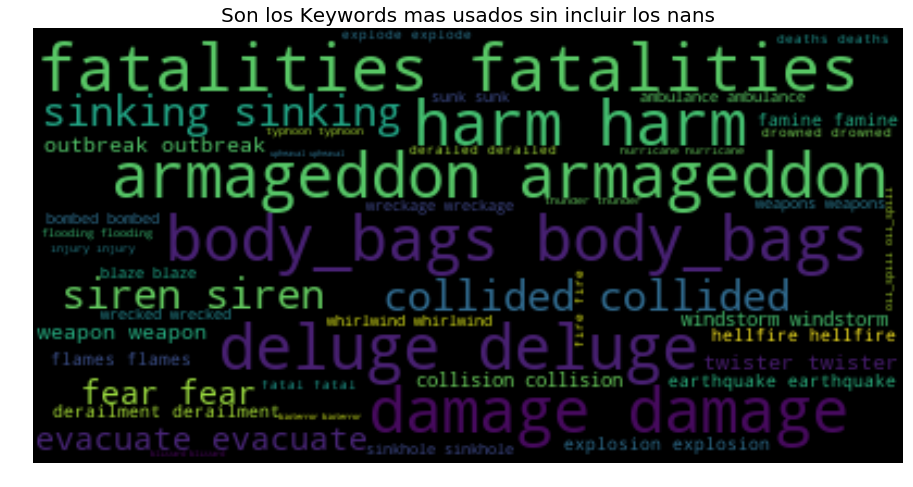

In [27]:
from wordcloud import WordCloud



text =" ".join(review for review in arch_keyword_sinnan.keyword)


wordcloud = WordCloud( max_words=200,
                          max_font_size=40, 
                          random_state=42).generate(text)


plt.figure(figsize=[16,8])
plt.title("Son los Keywords mas usados sin incluir los nans",fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Visu ? Top ten de los keyword que representan a un tweet verdadero

In [28]:
topten_Keyword_verdaderos=tabla_keyword.sort_values(by='True',ascending=False)
topten_Keyword_verdaderos=topten_Keyword_verdaderos.head(10)
topten_Keyword_verdaderos

target,keyword,False,True,totalUso
70,derailment,0.0,39.0,39.0
219,wreckage,0.0,39.0,39.0
153,outbreak,1.0,39.0,40.0
205,typhoon,1.0,37.0,38.0
62,debris,0.0,37.0,37.0
152,oil_spill,1.0,37.0,38.0
185,suicide_bomb,3.0,32.0,35.0
166,rescuers,3.0,32.0,35.0
187,suicide_bombing,1.0,32.0,33.0
96,evacuated,4.0,32.0,36.0


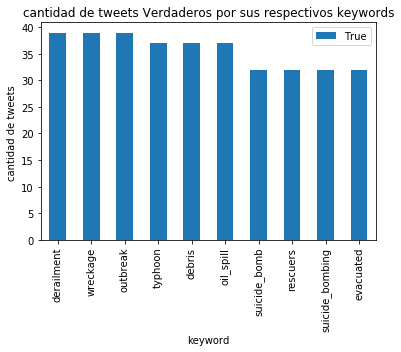

In [29]:
topten_Keyword_verdaderos.plot(x ='keyword', y='True', kind = 'bar')
plt.title('cantidad de tweets Verdaderos por sus respectivos keywords')
plt.ylabel('cantidad de tweets ')
plt.show()

In [30]:
topten_Keyword_false=tabla_keyword.sort_values(by='False',ascending=False)
topten_Keyword_false=topten_Keyword_false.head(10)
topten_Keyword_false

target,keyword,False,True,totalUso
29,body_bags,40.0,1.0,41.0
119,harm,37.0,4.0,41.0
8,armageddon,37.0,5.0,42.0
63,deluge,36.0,6.0,42.0
170,ruin,36.0,1.0,37.0
220,wrecked,36.0,3.0,39.0
204,twister,35.0,5.0,40.0
98,explode,35.0,3.0,38.0
106,fear,35.0,5.0,40.0
178,siren,35.0,5.0,40.0


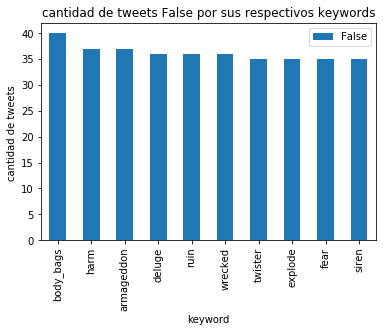

In [31]:
topten_Keyword_false.plot(x ='keyword', y='False', kind = 'bar')
plt.title('cantidad de tweets False por sus respectivos keywords')
plt.ylabel('cantidad de tweets ') 
plt.show()

# Analizamos por long de texto y los target 

In [32]:
arch_text=archTrain[['keyword','text','target']]
arch_text.head()

,keyword,text,target
0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [33]:
arch_text['longText']=arch_text['text'].str.len()
arch_text.head()

,keyword,text,target,longText
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,NaN,All residents asked to 'shelter in place' are ...,1,133
3,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [34]:
arch_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 4 columns):
keyword     7552 non-null object
text        7613 non-null object
target      7613 non-null int64
longText    7613 non-null int64
dtypes: int64(2), object(2)
memory usage: 238.0+ KB


In [35]:
arch_text.drop(['text'], axis=1,inplace=True)
arch_text.head()

,keyword,target,longText
0,NaN,1,69
1,NaN,1,38
2,NaN,1,133
3,NaN,1,65
4,NaN,1,88


In [36]:
long_target=arch_text[['longText','target']]
long_target.head()

,longText,target
0,69,1
1,38,1
2,133,1
3,65,1
4,88,1


In [37]:
long_target['cantidad']=1
long_target.head()

,longText,target,cantidad
0,69,1,1
1,38,1,1
2,133,1,1
3,65,1,1
4,88,1,1


In [38]:
long_target=pd.pivot_table(long_target,  values='cantidad', columns='target', index='longText',aggfunc=np.sum)
long_target.fillna(0,inplace=True)
long_target.head()

target,0,1
longText,,
7,3.0,0.0
8,4.0,0.0
9,2.0,0.0
10,2.0,0.0
11,4.0,0.0


In [39]:
long_target.reset_index(inplace=True)
long_target.rename(columns={0:"Falso",1:"Verdadero"},inplace=True)
long_target.head()

target,longText,Falso,Verdadero
0,7,3.0,0.0
1,8,4.0,0.0
2,9,2.0,0.0
3,10,2.0,0.0
4,11,4.0,0.0


In [40]:
sum(long_target['Falso'])

4342.0

In [41]:
long_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 3 columns):
longText     147 non-null int64
Falso        147 non-null float64
Verdadero    147 non-null float64
dtypes: float64(2), int64(1)
memory usage: 3.5 KB


In [42]:
long_target.describe()

target,longText,Falso,Verdadero
count,147.000000,147.000000,147.000000
mean,80.027211,29.537415,22.251701
std,42.627560,23.602958,31.068824
min,7.000000,0.000000,0.000000
25%,43.500000,17.000000,4.500000
50%,80.000000,28.000000,16.000000
75%,116.500000,36.000000,30.000000
max,157.000000,160.000000,277.000000


In [43]:
long_target.Verdadero.unique()

array([   0.,    1.,    2.,    4.,    3.,    8.,    6.,    5.,    9.,
          7.,   11.,   13.,   14.,   12.,   10.,   20.,   17.,   16.,
         25.,   15.,   21.,   31.,   22.,   38.,   19.,   32.,   33.,
         23.,   42.,   35.,   30.,   27.,   60.,   37.,   28.,   24.,
         41.,   26.,   36.,   18.,   29.,   40.,   46.,   52.,   70.,
        119.,  277.,  125.,  102.,  115.,  113.])

In [44]:
long_target.Falso.unique()

array([   3.,    4.,    2.,    5.,    8.,   12.,   10.,    7.,    6.,
         14.,   16.,   13.,   18.,   17.,   20.,   30.,   27.,   15.,
         22.,   23.,   19.,   28.,   33.,   31.,   25.,   21.,   24.,
         26.,   29.,   32.,   36.,   35.,   41.,   43.,   42.,   34.,
         37.,   40.,   38.,   39.,   46.,   48.,   45.,   58.,   67.,
         62.,   72.,  124.,   85.,  154.,  160.,  105.,    0.,    1.])

In [45]:
long_target.longText.unique()

array([  7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 157])

In [46]:
long_target.columns

Index(['longText', 'Falso', 'Verdadero'], dtype='object', name='target')

In [48]:
fig1_falso = px.parallel_coordinates(long_target, color="Falso", labels={'Verdadero','longText','Falso',},
                             color_continuous_scale=px.colors.sequential.Inferno)
fig1_falso.show()

In [55]:
px.parallel_coordinates(long_target, color="Verdadero", color_continuous_scale=['green',"red","blue"])
#fig2_verdadero                      